# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Необходимо провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Библиотеки

In [1]:
import os
import math 
import warnings

import pandas as pd
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

PATH = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/1. Исследование объявлений о продаже квартир/real_estate_data.csv'

## Первичный осмотр данных

In [2]:
if os.path.exists(PATH):
    try:
        data = pd.read_csv(PATH, sep='\t')
    except:
        print('Ошибка в считывании данных.')
else:
    print(f'Путь {PATH} не сущесвтует.')


display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных:**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In [4]:
display(data.duplicated().sum())

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

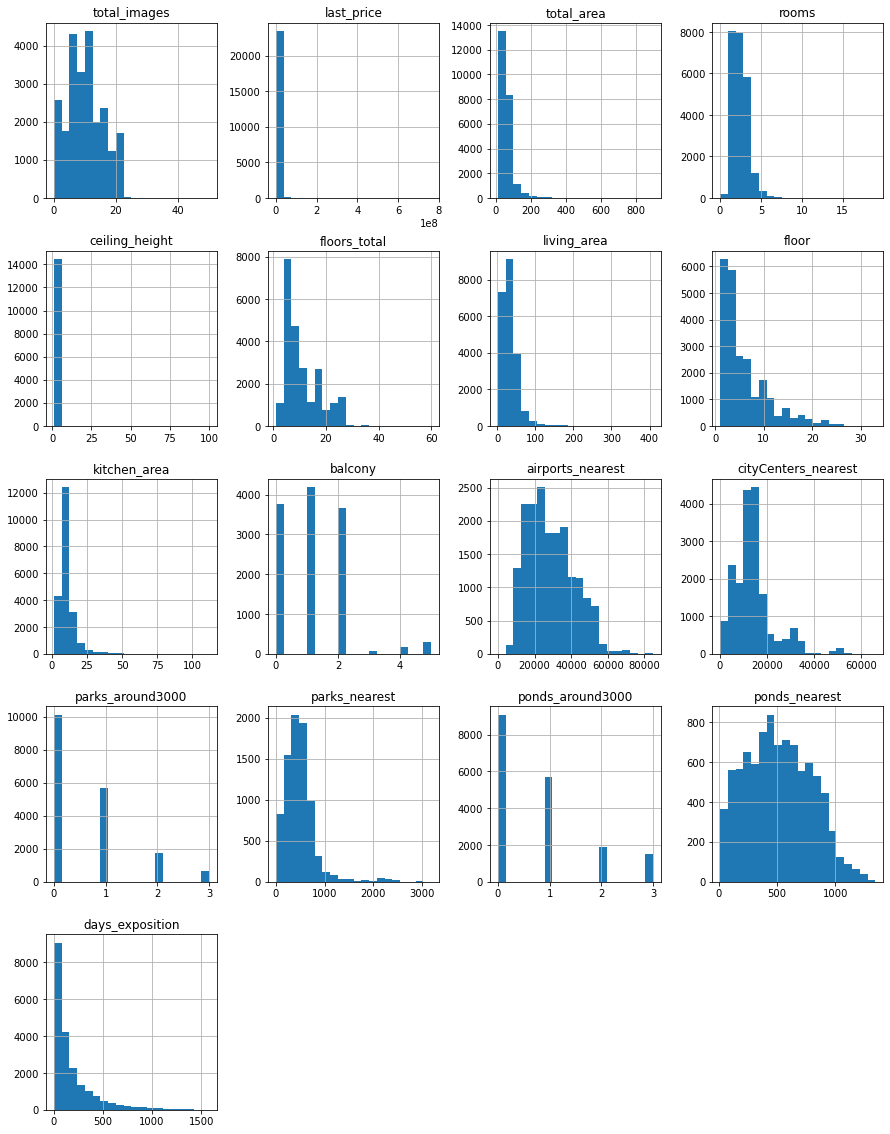

In [5]:
display(data.hist(bins=20, figsize=(15, 20)))

В ходе изучения общей инофрмации было выяснено, что
- во многих столбцах датафрейма есть прпоуски;
- столбцы `'is_apartment'`и `'first_day_exposition'`имеют неправильный тип данных;
- столбцы `'last_price'`, `'total_area'`, `'kitchen_area'`, `'ceiling_height'`, `'ceiling_height'`, судя по гистограммам, имеют аномально большие значения; 
- явных дубликатов не обнаружено, но они могут появиться в случае, если в столбце `'locality_name'` присутствуют неявные дубликаты.

## Предобработка данных

### Обработка оформления таблицы

Столбец таблицы "cityCenters_nearest" стилистически назван неправильно. Сделаем навзание в стиле snake_case. 

In [6]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
display(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца.

In [7]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

|Столбец|Описание данных|Возможная причина пропуска|Комментарий-гипотеза насчёт заполнения|
|:---|:---|:---|:---|
|ceiling_height|высота потолков|не указана пользователем| пропуски составляют больше трети записей, медианное значение в таком случае не подойдёт|
|floors_total|всего этажей в доме|возможно, все дома, где не указано количество этажей, являются одноэтажными| если все квартиры с пропущенным значением в этом столбце находятся на первом этаже, можно заменить значение столбца на 1|
|living_area|жилая площадь|пользователь не указал жилую площадь, т.к не знает отличие между жилой площадью и общей или эти две площади совпадают| в случае, если у квартиры нет коридоров, жилая площадь может совпадать с полной площадью - можно заполнить пропуски медианным значением для квартир с совпадающей общей площадью (в некотором диапазоне)|
|is_apartment|апртаменты|пользователь не указал информацию|скорее всего, пропуск обозначает, что квартира не является апартаментами, тогда надо заменить пропущенные значения на 0|
|kitchen_area|площадь кухни|т.к. в квартирах-студиях нет чёткого отделения кухни от остальной жилой зоны, пользователи могли не заполнить эту информацию||
|balcony|количество балконов|пользователь не указал информацию|скорее всего, пропуск обозначает, что что у квартиры нет балконов, тогда надо заменить пропущенные значения на 0|
|locality_name|название населённого пункта|если выбор населённого пункта можно было сделать только из ограниченного числа вариантов, то в предложенном списке могло не оказаться какого-то населённого пункта|если недвижимость с пропусками будет схожа по картографическим признакам, то можно предположить, что все квартиры из одного населённого пункта, и дать ему какое-то навзание|
|airports_nearest|расстояние до ближайшего аэропрта||
|city_centers_nearest|расстояние до центра города|возможно, населённый пункт, в котором находится квартира, не является городом|
|parks_around3000|число парков в радиусе 3 км|скорее всего, пропуск означает, что в радиусе 3км нет парков|
|parks_nearest|расстояние до ближайшего парка|возможно, имеется в виду ближайший парк в каком-то определённом радиусе|
|ponds_around3000|число водоёмов в радиусе 3 км|скорее всего, пропуск означает, что в радиусе 3км нет водоёмов|
|ponds_nearest|расстояние до ближайшего водоёма|возможно, имеется в виду ближайший парк в каком-то определённом радиусе|
|days_exposition|сколько дней было размещено объявление|квратира ещё не снята с продажи|

Если картографические данные добывались программным способом, возможно, есть проблемы с алгоритмами или параметрами программы

Проверим выдвинутые гипотезы для заполнения пропусков

**floors_total**

In [8]:
display(data.loc[data['floors_total'].isna(), 'floor'])

186       4
237       1
457      12
671       8
1757      9
         ..
22542     3
22656    20
22808     6
23590    18
23658     8
Name: floor, Length: 86, dtype: int64

Гипотеза не подтвердилась

**locality_name**

In [9]:
display(data.loc[data['locality_name'].isna(), ['airports_nearest', 'city_centers_nearest', \
                                                'parks_around3000', 'parks_nearest', 'ponds_around3000', \
                                                'ponds_nearest', 'days_exposition']])

,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Гипотеза не подтвердилась

**Исследуем внимательнее кваритры с незаполненной жилой площадью**

In [10]:
display(data.loc[data['living_area'].isna(), 'rooms'])

3        3
7        2
30       1
37       2
44       1
        ..
23642    3
23663    4
23670    1
23679    1
23697    2
Name: rooms, Length: 1903, dtype: int64

Квартиры с незаполненой жилой площадью не обязательно однокомнатные, поэтому лучше заполнить пропуски медианным значением по числу комнат и общей площади, округлённой до десятков квадратных метров.

**Исследуем внимательнее кваритры с незаполненной площадью кухни**

In [11]:
display(data.loc[data['kitchen_area'].isna(), 'rooms'])

3        3
30       1
37       2
44       1
59       1
        ..
23655    1
23663    4
23670    1
23679    1
23696    2
Name: rooms, Length: 2278, dtype: int64

Квартиры с незаполненой площадью кухни не обязательно студии, поэтому лучше заполнить пропуски медианным значением по числу комнат и общей площади, округлённой до десятков квадратных метров.

**Заполним пропущенные значения там, где это возможно.**

Заполним пропуски в колонках `'is_apartment'` и `'balcony'` нулями.

In [12]:
columns_to_replace = ['is_apartment', 'balcony']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

Заполним пропуски в колонках `'living_area'` и `'kitchen_area'` медианным значением по числу комнат и округлённой общей площади. Для удобства введём дополнительную колонку `'total_area_rounded'`. Для комбинации некоторого чила комнат и округлённой общей площади не будет иметься заполненных строк в таблице, поэтому некоторые пропуски заполнить не удастся. Тем не менее, их количество существенно уменьшится

In [13]:
data['total_area_rounded'] = round(data['total_area']/10)*10 
rooms_for_living_area = data.loc[data['living_area'].isna(), 'rooms'].unique()
areas_for_living_area = data.loc[data['living_area'].isna(), 'total_area_rounded'].unique()
for number_of_rooms in rooms_for_living_area:
    for area in areas_for_living_area :
        data.loc[(data['living_area'].isna()) &\
                 (data['rooms'] == number_of_rooms) &\
                 (data['total_area_rounded'] == area), 'living_area'] =\
        data.loc[(data['rooms'] == number_of_rooms) &\
                 (data['total_area_rounded'] == area), 'living_area'].median()

In [14]:
rooms_for_kitchen_area = data.loc[data['kitchen_area'].isna(), 'rooms'].unique()
areas_for_kitchen_area = data.loc[data['kitchen_area'].isna(), 'total_area_rounded'].unique()
for number_of_rooms in rooms_for_kitchen_area:
    for area in areas_for_kitchen_area:        
        data.loc[(data['kitchen_area'].isna()) &\
                 (data['rooms'] == number_of_rooms) &\
                 (data['total_area_rounded'] == area), 'kitchen_area'] =\
        data.loc[(data['rooms'] == number_of_rooms) &\
                 (data['total_area_rounded'] == area), 'kitchen_area'].median()

In [15]:
data.drop(columns=['total_area_rounded'], axis=1)
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                17
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              214
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_rounded          0
dtype: int64

### Обработка аномальных значений

В некоторых объявлениях число комнат равно нулю. Это возможно, когда продаётся земельный участок. В таком случае жилая площадь должна быть равна нулю.

In [16]:
display(data.loc[data['rooms'] == 0, ['total_area', 'living_area']])

,total_area,living_area
144,27.00,15.50
349,25.00,17.00
440,27.11,24.75
508,34.40,24.30
608,25.00,17.00
...,...,...
23210,26.00,18.00
23442,27.70,18.00
23554,26.00,18.50
23592,29.00,18.00


Жилая площадь не равна нулю, следовательно, данные заполненые неверно. Попробуем проверить, являются ли данные квартиры студиями.

In [17]:
display(data.loc[(data['rooms'] == 0) & (data['studio'] == True), ['total_area', 'living_area']])

,total_area,living_area
144,27.00,15.50
440,27.11,24.75
608,25.00,17.00
697,24.10,17.50
716,17.00,12.00
...,...,...
22867,30.00,18.20
22877,28.00,18.00
23210,26.00,18.00
23554,26.00,18.50


Большая часть квартир с нулём комнат, но ненулевой жилой площадью действительно оказались студиями. Проверим, какими значениями пользователи заполняли колонку `'rooms'` при продаже квартир-студий.

In [18]:
display(data.loc[data['studio'] == True, 'rooms'].unique())

array([0, 1], dtype=int64)

Изменим число комнат во всех квартирах студиях на 1.

In [19]:
data.loc[data['studio'] == True, 'rooms'] = 1

Проверим, сколько осталось квартир с нулём комнат.

In [20]:
display(len(data.loc[data['rooms'] == 0]))

59

Посмотрим на медиану и среднее значение жилой площади для однокомнатных и двухкомнатных квартир.

In [21]:
display(data.loc[data['rooms'] == 1, 'living_area'].median())
display(data.loc[data['rooms'] == 1, 'living_area'].mean())
display(data.loc[data['rooms'] == 2, 'living_area'].median())
display(data.loc[data['rooms'] == 2, 'living_area'].mean())

17.7

17.939276548942967

30.4

31.75855290414408

Судя по значениям, почти во всех объявлениях с нулём комнат на самом деле однокомнатыне или двухкомнатные квартиры. Заменим количество комнат на 1 или 2 в зависимости от близости значения жилой площади к медианам для однокомнатных и двухкомнтаных квартир.

In [22]:
def set_new_rooms_number(row):
    median_1 = data.loc[data['rooms'] == 1, 'living_area'].median()
    median_2 = data.loc[data['rooms'] == 2, 'living_area'].median()
    if  ~(math.isnan(row['living_area'])) & (abs(row['living_area'] - median_1) <= abs(row['living_area'] - median_2)):
        return 1
    elif ~math.isnan(row['living_area']):
        return 2
    
data.loc[data['rooms'] == 0, 'rooms'] = data.apply(set_new_rooms_number, axis=1)

In [23]:
display(data['rooms'].unique())

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

**Рассмотрим внимательнее другие столбцы, заполненные пользователями. Построим более наглядные графики для них.**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23682 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23485 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

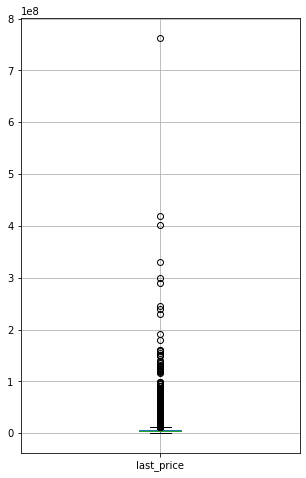

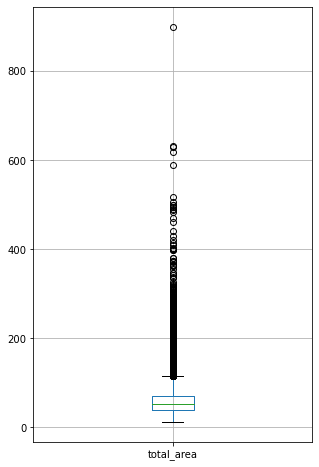

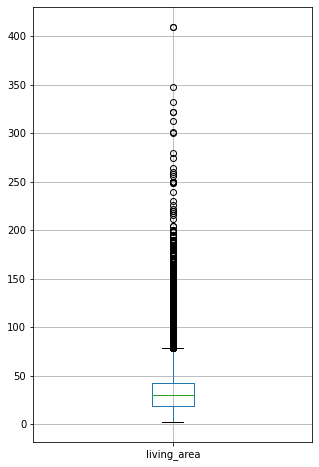

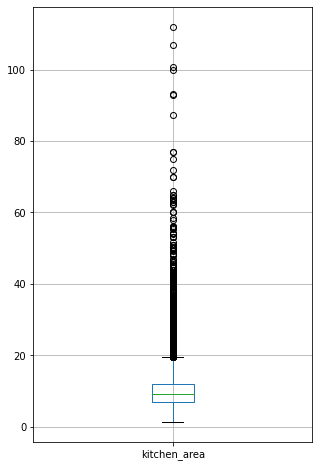

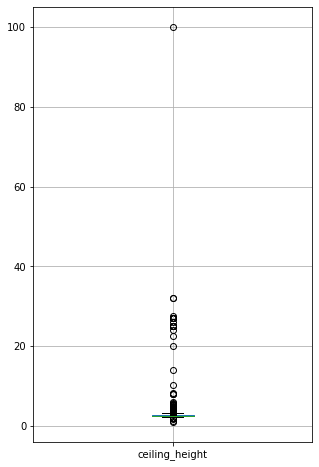

In [25]:
columns_for_clearing = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height']
for column in columns_for_clearing:
    data.boxplot(column, figsize=(5, 8))
    plt.show()

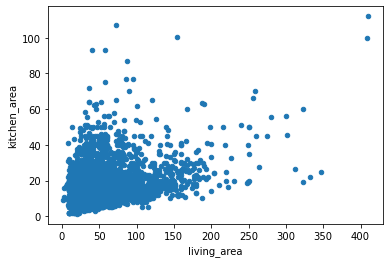

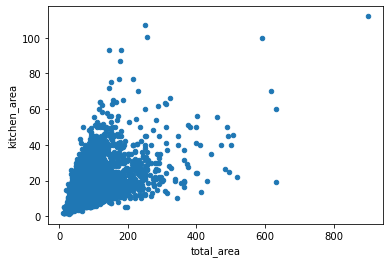

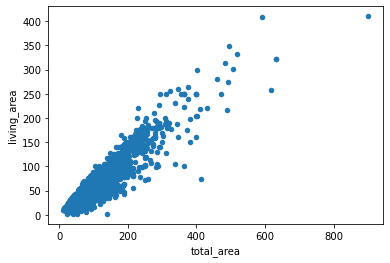

In [26]:
data.plot(x='living_area', y='kitchen_area', kind='scatter')
plt.show()
data.plot(x='total_area', y='kitchen_area', kind='scatter')
plt.show()
data.plot(x='total_area', y='living_area', kind='scatter')
plt.show()

**Сначала попробуем исправить неправильные данные в колонке с высотой потолков**

In [27]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Посчитаем количество строк с аномальными занчениями в высоте потолков. Нормальными будем считать значения, находящиеся внутри "ящика с усами".

In [28]:
display(len(data[(data['ceiling_height'] >= data['ceiling_height'].quantile(0.75) + 1.5*(data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.75))) |\
                 (data['ceiling_height'] <= data['ceiling_height'].quantile(0.25) - 1.5*(data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.75)))]))

7769

Таких записей оказалось очень много. Попробуем другой подход: будем считать аномальными высоты потолка, меньшие 2.5 м и большие 6 м.

In [29]:
display(len(data[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5)]))

102

Попробуем привести "аномальные значения" к нормальным. В некоторых случаях можно считать, что пользователь ошибся в разрядах числа, поэтому поможет деление на 10. Если при этом значение окажется меньше или больше нормального, удалим его из таблицы.

In [30]:
data.loc[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5), 'ceiling_height'] =\
data.loc[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5), 'ceiling_height']/10

Выведем количетсво объявлений, высота потолков в которых осталась аномальной:

In [31]:
display(len(data[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 6)]))

83

In [32]:
display(len(data[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 6)]))
display(len(data[~((data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 6))]))
display(len(data[~(data['ceiling_height'] < 2.5) & ~(data['ceiling_height'] > 6)]))
display(len(data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 6)]))

83

23616

23616

14421

По сравнению с размером датафрейма 83 строки - это достаточно мало, поэтому ими можно принебречь. Очистим датафрейм от них.

In [33]:
data = data[~((data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 6))]
print(len(data))

23616


<AxesSubplot:>

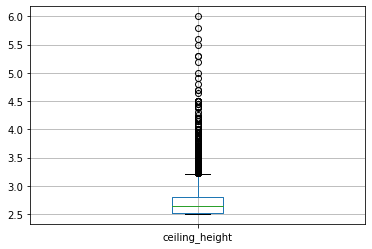

In [34]:
display(data.boxplot('ceiling_height'))

Очистим от аномальных значений столбцы `'last_price'`, `'total_area'`, `'living_area'`, `'kitchen_area'`. Считаем нормальными значения между <span style="color: blue;">между 2.5 и 97.5 квантилями</span> (уровень доверия - 95%).

In [35]:
columns_for_clearing = ['last_price', 'total_area', 'living_area', 'kitchen_area']
print(len(data))
for column in columns_for_clearing:
    q97_5 = data[column].quantile(0.975)
    q2_5 = data[column].quantile(0.025)
    data = data[(data[column] >= q2_5) & (data[column] <= q97_5)]
len(data)

23616


19303

### Изменение типов данных

Колонка `'is_apartment'` должна иметь булев тип, а колонку `'first_day_exposition'` лучше преобразовать в тип *datetime* для дальнейшего удобства работы

In [36]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [38]:
data['first_day_exposition']

1       2018-12-04
2       2015-08-20
7       2019-04-18
8       2018-05-23
9       2017-02-26
           ...    
23690   2018-07-19
23691   2016-10-13
23693   2016-08-05
23695   2018-01-15
23696   2018-02-11
Name: first_day_exposition, Length: 19303, dtype: datetime64[ns]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19303 entries, 1 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19303 non-null  int64         
 1   last_price            19303 non-null  float64       
 2   total_area            19303 non-null  float64       
 3   first_day_exposition  19303 non-null  datetime64[ns]
 4   rooms                 19303 non-null  int64         
 5   ceiling_height        11874 non-null  float64       
 6   floors_total          19246 non-null  float64       
 7   living_area           19303 non-null  float64       
 8   floor                 19303 non-null  int64         
 9   is_apartment          19303 non-null  bool          
 10  studio                19303 non-null  bool          
 11  open_plan             19303 non-null  bool          
 12  kitchen_area          19303 non-null  float64       
 13  balcony         

### Работа с дубликатами

In [40]:
display(data.duplicated().sum())

0

В столбце `'locality_name'` могут быть неявные дубликаты. Выведем список уникальных значений для этого столбца.

In [41]:
display(len(data['locality_name'].unique()))
display(data['locality_name'].unique())

295

array(['посёлок Шушары', 'Санкт-Петербург', 'посёлок Мурино', 'Ломоносов',
       'Сертолово', 'Петергоф', 'Пушкин', 'посёлок Парголово',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'посёлок Аннино', 'городской посёлок Янино-1', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая', 'Павловск',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'поселок Новый Свет',
       'дер

Создадим в таблице новый столбец с "чистыми" навзаниями

In [42]:
data['clear_locality_name'] = data['locality_name'].str.replace('деревня', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('поселок', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('посёлок', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('городского типа', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('городской', '')    
data['clear_locality_name'] = data['clear_locality_name'].str.replace('садовое товарищество', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('коттеджный', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('станции', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('имени', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('село', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
data['clear_locality_name'] = data['clear_locality_name'].str.replace('при железнодорожной', '')
data['clear_locality_name'] = data['clear_locality_name'].str.strip()
display(len(data['clear_locality_name'].unique()))
display(data['clear_locality_name'].sort_values().unique())

245

array(['Агалатово', 'Александровская', 'Аннино', 'Аро', 'Барышево',
       'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск',
       'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа',
       'Большие Колпаны', 'Большое Рейзино', 'Бугры', 'Будогощь',
       'Ваганово', 'Вартемяги', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войсковицы', 'Войскорово', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Вырица', 'Высокоключевой', 'Высоцк',
       'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево',
       'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы',
       'Громово', 'Дзержинского', 'Дубровка', 'Елизаветино', 'Жил',
       'Жилгородок', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское',
       'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво',
       'Калитино', 'Кальтино', 'Каменногорск', 'Камышовка', 'Келози',
       'Кивеннапа Север', 'Кикерино', 'Кингисепп', 'Кингисеппский',
       'Кипень', 'Кириши', 'Кировск', 'Кир

In [43]:
atributes = list(data.columns)
atributes.remove('locality_name')
display(data.duplicated(subset=atributes).sum())

0

Удаление 50 неявных дубликатов из колонки `'locality_name'` не привело к появлению новых дубликтов строк таблицы.

**Датафрейм готов к дальнейшей работе**

### Посчитайте и добавьте в таблицу новые столбцы

In [44]:
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['sqr_m_price'] = data['last_price']/data['total_area']
data['day_of_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year
data['floor_type'] = data.apply(get_floor_type, axis=1)
data['city_centre_nearest_km'] = round(data['city_centers_nearest']/1000)
display(data[['sqr_m_price', 'day_of_exposition', 'month_of_exposition', 'year_of_exposition', 'floor_type', 'city_centre_nearest_km']].head(5))

,sqr_m_price,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centre_nearest_km
1,82920.792079,1,12,2018,первый,19.0
2,92785.714286,3,8,2015,другой,14.0
7,110544.692737,3,4,2019,другой,12.0
8,87454.764777,2,5,2018,другой,NaN
9,88524.590164,6,2,2017,другой,15.0


## Исследовательский анализ данных

### Изучение данных о квартирах

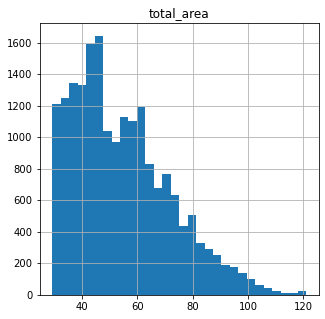

Описание total_area:
Среднее значение: 54.50962492876732.
Медиана: 51.2
Мода: 45.0


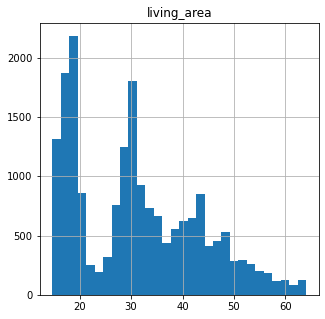

Описание living_area:
Среднее значение: 31.13716191819917.
Медиана: 30.0
Мода: 18.0


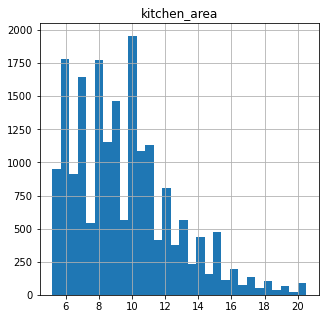

Описание kitchen_area:
Среднее значение: 9.533166347199934.
Медиана: 9.0
Мода: 10.0


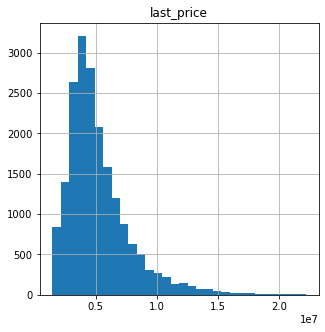

Описание last_price:
Среднее значение: 5241231.928560328.
Медиана: 4600000.0
Мода: 4500000.0


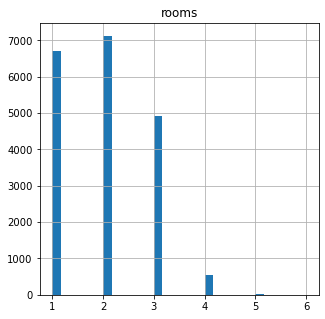

Описание rooms:
Среднее значение: 1.9674661969642024.
Медиана: 2.0
Мода: 2


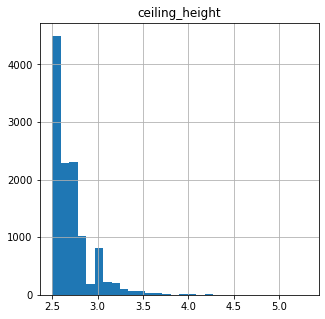

Описание ceiling_height:
Среднее значение: 2.6918628937173184.
Медиана: 2.6
Мода: 2.5


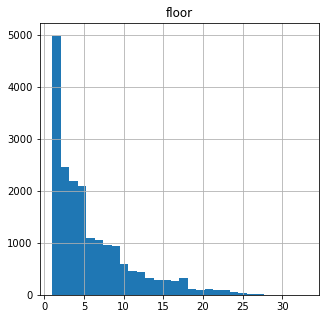

Описание floor:
Среднее значение: 5.993576128062996.
Медиана: 5.0
Мода: 2


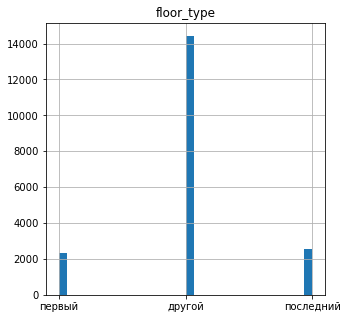

Описание floor_type:
Мода: другой


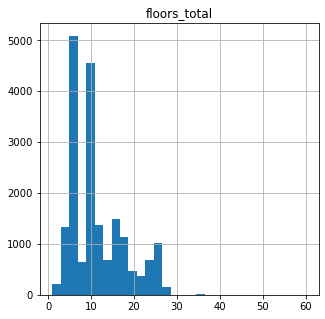

Описание floors_total:
Среднее значение: 10.963317052894109.
Медиана: 9.0
Мода: 5.0


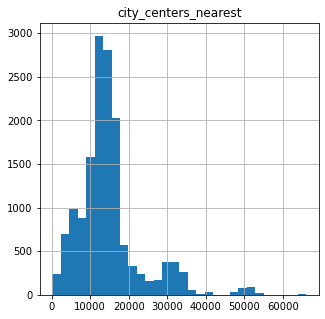

Описание city_centers_nearest:
Среднее значение: 14768.601065246337.
Медиана: 13492.5
Мода: 8460.0


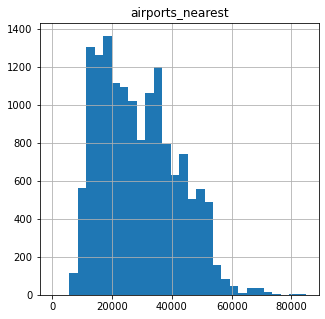

Описание airports_nearest:
Среднее значение: 29000.49420077323.
Медиана: 27385.5
Мода: 37434.0


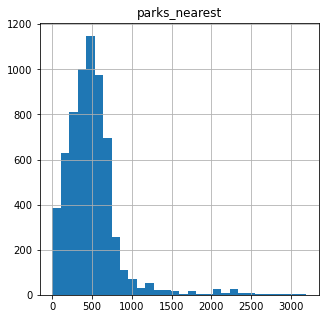

Описание parks_nearest:
Среднее значение: 494.94123207814715.
Медиана: 458.0
Мода: 441.0


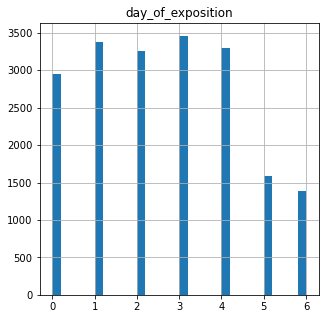

Описание day_of_exposition:
Среднее значение: 2.573537792053049.
Медиана: 3.0
Мода: 3


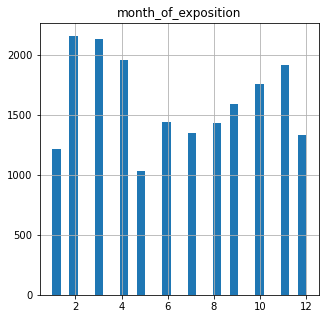

Описание month_of_exposition:
Среднее значение: 6.388747863026473.
Медиана: 6.0
Мода: 2


In [45]:
columns_for_research = ['total_area', 'living_area', 'kitchen_area', 'last_price','rooms', 
                        'ceiling_height', 'floor', 'floor_type', 'floors_total', 'city_centers_nearest', 
                        'airports_nearest', 'parks_nearest', 'day_of_exposition', 'month_of_exposition']

for column in columns_for_research:
    data[column].hist(bins=30, figsize=(5, 5)).set_title(column)
    plt.show()
    print(f'Описание {column}:')
    try:
        mean = data[column].mean()
        median = data[column].median()
        print(f'Среднее значение: {mean}.')
        print(f'Медиана: {median}')
    except:
        pass
    mode =  data[column].mode()[0]
    print(f'Мода: {mode}')
    

По гистограммам можно заметить, что

- чаще всего продают недвижимость с общей площадью ~50 кв. м.;
- чаще всего продают недвижимость с жилой площадью 30-50 кв. м.;
- кухни чаще всего имеют площадь 5-10 кв. м.;
- основная масса квартир проадётся по цене от 2 до 8 миллионов;
- чаще всего встречаются двухкомнатные квартиры, чуть реже - однокомнтаные и студии, ещё реже - трёхкомнатные; квартиры с 4+ комнатами сравниетльно редки;
- большинство кваритр имеет потолок до 3.2 м; больше всего квартир с потолками 2.5 м;
- чаще всего продают квартиры, находящиеся с 1 по 5 этаж, притом особенно часто - находящиеся на 2;
- чаще всего продают квартиры в 5-, 10- и 15-этажных домах; скорее всего это связано с тем, что такие дома чаще всего строятся;
- чаще всего продают недвижимость, находящуюся в пределах 20 км от центра города; наиболее часто встречается недвижимость в 12 км от центра, а недвижимость, находящаяся в центре города и на растоянии в 20 км продают почти одинаково часто;
- чаще всего недвижимость находится от 10 до 52 км от аэропорта; недвижимости в радиусе 7 км от аэропорта нет;
- чаще всего ближайший парк находится в пределах 800 м от недвижимости;
- объявления о продаже квартиры чаще всего появляются в будние дни; в субботу и воскресенье объявления подают в 2-3 раза реже;
- самое большое количество публикация объявлений наблюдается в феврале, марте и апреле; затем в мае идёт резкий спад количества публикаций, после чего наблюдается стабильный рост вплоть до ноября, где показатель почти сопоставим с апрельским; в январе и феврале снова наблюдается спад.
- <span style="color: blue;">почти все характеристики имеют распределение Пуассона, о чём свидетельствует "обрезанная" слева или асимметричная параболическая форма. Исключение составляют колонки `'floor_type'`, `'day_of_exposition'`и `'month_of_exposition'`.</span>

### Изучение скорости продажи квартир

Построим гистограмму, рассмотрим описание данных и визуализируем его с помощью диаграммы размаха.

<AxesSubplot:>

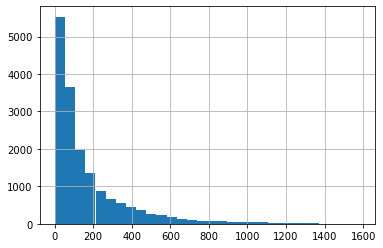

In [46]:
display(data['days_exposition'].hist(bins=30))

In [47]:
data['days_exposition'].describe()

count    16922.000000
mean       173.714691
std        212.137794
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

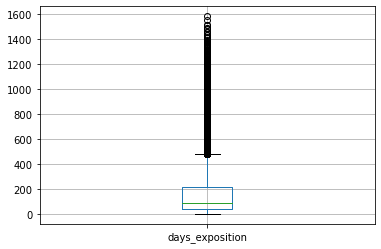

In [48]:
display(data.boxplot('days_exposition'))

Продажа квартиры обычно занимает 92 дня. Быстрыми можно считать продажи, совершённые за период меньше 44 дней, а необычайно долгими - более чем за 480 дней.

### Изучение факторов, наиболее сильно влияющие на цену квартиры

Найдём корреляцию цены с некоторыми параметрами квартиры: общей площадью, жилой площадью, площадью кухни, количеством комнат, типа этажа квартиры и даты размещения. Визуализируем данные с помощью диаграмм рассеяния и гbстограмм.

Коэффициент корреляции total_area и цены: 0.6965765007215631


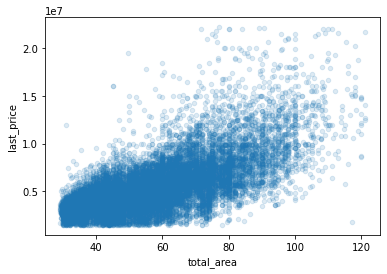

Коэффициент корреляции living_area и цены: 0.5612025383748583


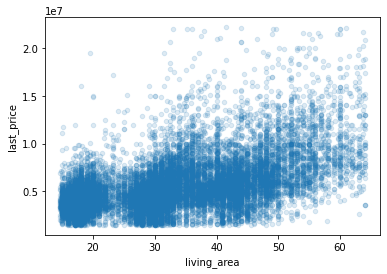

Коэффициент корреляции kitchen_area и цены: 0.5176504071552979


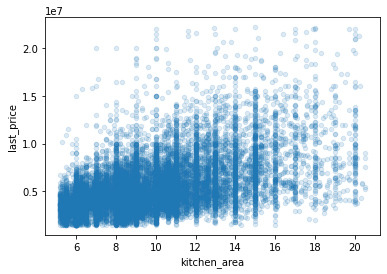

Коэффициент корреляции rooms и цены: 0.38944250413225856


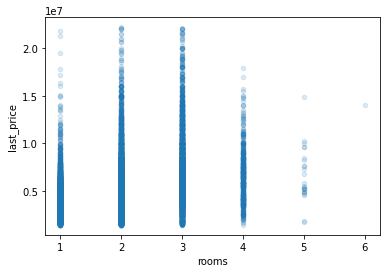

In [49]:
columns_for_research = ['total_area', 'living_area', 'kitchen_area', 'rooms']
for column in columns_for_research:
    corr = data[column].corr(data['last_price'])
    print(f'Коэффициент корреляции {column} и цены: {corr}')
    data.plot(x=column, y='last_price', kind='scatter', alpha=0.15)
    plt.show()
    

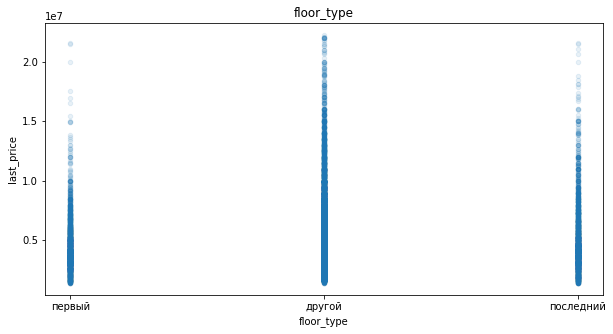

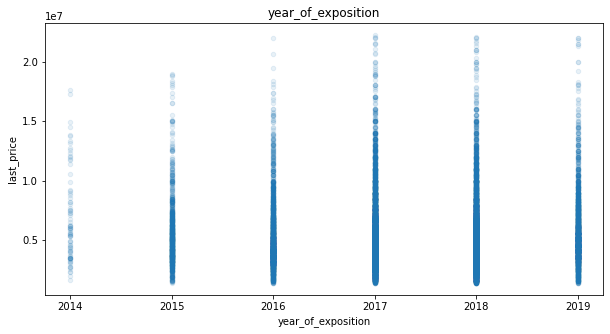

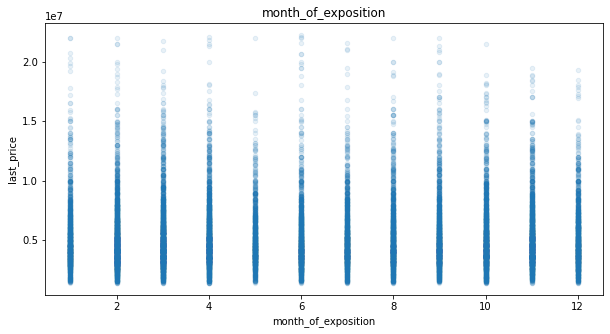

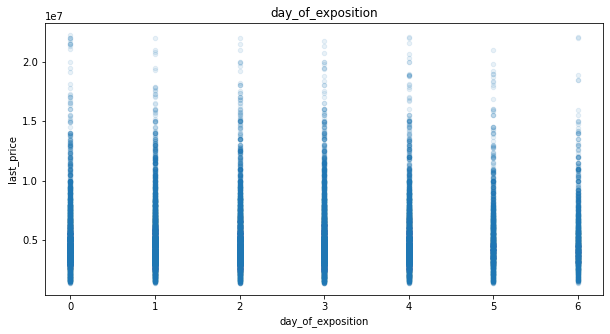

In [50]:
columns_for_research = ['floor_type','year_of_exposition', 'month_of_exposition', 'day_of_exposition']
for column in columns_for_research:
    data.plot(x=column, y='last_price', kind='scatter', figsize=(10, 5), alpha=0.1, title=column)
    plt.show()
    

По полученным графикам видно, что 
- на цену недвижимости сильнее всего влияет её общая площадь;
- слабее влияет жилая площадь, а ещё слабее - площадь кухни;
- количество комнат в квартире влияет на её стоимость на 75% меньше, чем общая площадь;
- недвижимость на первом и последнем этажах в среднем стоит меньше, чем на других;
- цена на недвижимость в среднем растёт вместе с годом публикации объявления; 
- месяц публикации заявления не влияет на цену;
- в субботу и воскресенье реже публикуются объявления о продаже дорогих квартир, чем в будни.

### Изучение средних цен за кв. м. площади недвижимости в населённых пунктах

Найдём 10 населённых пунктов с наибольшим количеством объявлений.

In [51]:
target_locality = data.groupby('clear_locality_name')['clear_locality_name'].count().sort_values(ascending=False).head(10)
print(target_locality)

clear_locality_name
Санкт-Петербург    12927
Мурино               456
Кудрово              387
Шушары               385
Всеволожск           352
Колпино              310
Пушкин               285
Парголово            271
Гатчина              269
Выборг               189
Name: clear_locality_name, dtype: int64


In [52]:
means=[]
medians=[]
for locality in target_locality.index:
    means.append(round(data.loc[data['clear_locality_name'] == locality, 'last_price'].mean(), 1))
    medians.append(data.loc[data['clear_locality_name'] == locality, 'last_price'].median())
df = pd.DataFrame({'locality_name': target_locality.index, 'mean_price_sqr_m': means, 'median_price_sqr_m': medians})
display(df.sort_values('mean_price_sqr_m', ascending=False))

,locality_name,mean_price_sqr_m,median_price_sqr_m
0,Санкт-Петербург,6029201.5,5250000.0
6,Пушкин,5584223.8,5150000.0
7,Парголово,4609562.6,4250000.0
2,Кудрово,4535430.2,3990000.0
3,Шушары,4143285.7,4040000.0
1,Мурино,3923241.7,3650000.0
5,Колпино,3868449.2,3650000.0
4,Всеволожск,3783280.8,3550000.0
8,Гатчина,3498328.5,3200000.0
9,Выборг,3158386.2,2950000.0


Из десяти населённых пунктов с наибольшим количеством публикаций обявлений
- самая высокая средняя стоимость кв. м. площади недвижимости в Санкт-Петербурге, 
- самая низкая - <span style="color: blue;">в Выборге</span>.

### Изучение влияния дальности недвижимости от центра города в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге и найдём среднюю цену за каждый километр близости к центру. Для начала найдём, расстояние до центра для наиболее отдалённых квартир.

In [53]:
SPb_data = data.loc[data['locality_name'] == 'Санкт-Петербург', ['last_price','city_centre_nearest_km']]
SPb_data = SPb_data.dropna(subset=['city_centre_nearest_km'])
print(SPb_data['city_centre_nearest_km'].sort_values(ascending=False).unique())

[29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12.
 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


Найдём среднюю цену объекта недвижимости для каждого километра.

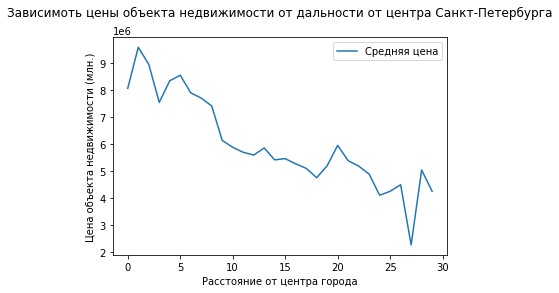

In [54]:
mean_price_for_km = []
for delta in SPb_data['city_centre_nearest_km'].sort_values(ascending=False).unique():
    mean_price_for_km.append(SPb_data.loc[SPb_data['city_centre_nearest_km'] == delta, 'last_price'].mean())
df = pd.DataFrame({'delta': SPb_data['city_centre_nearest_km'].sort_values(ascending=False).unique(), 'avg_price': mean_price_for_km})
df.plot(x='delta', y='avg_price', title='Зависимоть цены объекта недвижимости от дальности от центра Санкт-Петербурга\n', xlabel='Расстояние от центра города', ylabel='Цена объекта недвижимости (млн.)', label='Средняя цена')
plt.show()

По построенноиу графику можно заметить, что 
- при увеличении растояния от центра горда цена на недвижимость в среднем падает.

## Общий вывод

<div style="border:solid #32a1ce 3px; padding: 40px">
 
<font size=4>
    
В ходе исследования было выяснено, что 
- недвижимость в среднем продаётся за 90 дней;
- больше всего на цену недвижимости влияет её общая площадь; далее по влиянию идут такие параметры, как жилая площадь, площадь кухни - и лишь в последнюю очередь число комнат;
- цена на недвижимость растёт с годом публикации объявления о продаже;
- среди всех населённых пунктов близких к Санкт-Петербургу самую дорогую среднюю цену за квадратный метр недвижимости имеет непосредственно сам город; она почти в два раза превышает соответствующую цену в десятом по популярности публикации обявлений о продаже населённом пункте - Выборге;
- между ценой на объект недвижимости в городе и её удалённойстью от центра существует практически прямая зависимость.
    